#### Шаповалов Иван РЛ1-43
## Отчет по лаборатораной работе №2 ОТЦ Вынужденные колебания в связанных контурах
*Цель работы:* исследование воздействия гармонического колебания на систему связанных контуров; измерение резонансных кривых и  определение параметров контуров при различной степени связи.


*Описание лабораторной установки:*
В состав лабораторной установки входят лабораторный макет «Колебательные контуры» (рис. 1), осциллограф АСК-1022, генератор сигналов низкочастотный Г3-112 и источник питания. 
В данной работе проводится исследование системы из двух связанных контуров. Первый контур образован соединением катушки индуктивности L1 и конденсатора С2, второй - соединением катушки индуктивности L2 и конденсатора С6. Номинальное значение индуктивностей  L1 = L2 = 1700 мкГн, сопротивление потерь обоих катушек в диапазоне частот 100-300 кГц равно 130 Ом. Конденсаторы С2 и С6 являются переменными (С2 = 30…1000 пФ), что позволяет  настроить оба контура на заданную резонансную частоту. В обоих контурах  можно вводить дополнительные потери с помощью потенциометров R4 и R6. Связь между контурами магнитная и определяется расстоянием между катушками контуров. Катушки обоих контуров расположены соосно. Катушка первого контура неподвижна, а катушка второго контура находится на ходовом винте и перемещается при его вращении (ручка на правой боковой панели макета). Расстояние между катушками определяется по указателю в верхней части макета. Первый колебательный контур является параллельным, поэтому гармонический сигнал с выхода генератора Г3-112 подается на вход усилителя – генератора тока, а первый контур подключается к его выходу (см. работу 1).  Напряжения  питания усилителя подаются на макет по кабелю от источника питания. Использование двухканального осциллографа АСК-1022 позволяет измерять резонансные характеристики обоих контуров одновременно.

<img src="Лабы/1/1.png" alt="drawing" width="500"/>

In [2]:
import pandas as pd
#from pathlib import Path
#path_1 = Path(r'C:\Users\Asus\Documents\ВУЗ\4 семестр\ОТЦ\Лабы\1\much less Kkr without generator.txt') # absolute path
#csvframe = pd.read_csv('C:\Users\Asus\Documents\ВУЗ\4 семестр\ОТЦ\Лабы\1\much less Kkr without generator.txt')

much_less_Kkr_without_generator = pd.read_csv('Лабы/1/much_less_Kkr_without_generator_ispr.txt',sep = ' ',names = ["f, кГц","U, В"])
much_less_Kkr = pd.read_csv('Лабы/1/much less Kkr.txt',sep = ' ',names = ["f, кГц","U, В"])
Kravno2_42Kkr = pd.read_csv('Лабы/1/Kravno2_42Kkr.txt',sep = ' ',names = ["f, кГц","U, В"])
Kravno2_42Kkr_Bezpitania = pd.read_csv('Лабы/1/Kravno2_42Kkr_Bezpitania.txt',sep = ' ',names = ["f, кГц","U, В"])
equal_Kkr_Bezpitania = pd.read_csv('Лабы/1/equal Kkr_Bezpitania.txt',sep = ' ',names = ["f, кГц","U, В"])
eqaul_Kkr = pd.read_csv('Лабы/1/eqaul Kkr.txt',sep = ' ',names = ["f, кГц","U, В"])

Final = pd.MultiIndex(levels=[['K << Kkr','K = Kkr',"K = 2.42 Kkr"],["f, кГц","U, В"]],
               codes=[[0,0,1,1,2,2],
                      [0,1,0,1,0,1]])
without_generator = pd.concat([much_less_Kkr_without_generator, equal_Kkr_Bezpitania, Kravno2_42Kkr_Bezpitania], axis=1)
without_generator.columns = Final
with_generator = pd.concat([much_less_Kkr, eqaul_Kkr, Kravno2_42Kkr], axis=1)
with_generator.columns = Final


Рассмотрим сначала даннные относящие к **первичному контуру**. В ходе экперимента были полученны следующие данные:<br>

In [3]:
with_generator

K << Kkr      K = Kkr       K = 2.42 Kkr      
     f, кГц U, В  f, кГц  U, В       f, кГц  U, В
0     190.0  0.6   210.0  0.96        225.0  2.20
1     215.0  1.1   230.0  2.90        230.0  2.70
2     230.0  1.6   240.0  3.50        235.0  3.60
3     235.0  2.4   245.0  4.10        240.0  3.20
4     240.0  3.0   250.0  3.20        245.0  1.80
5     242.5  3.4   255.0  3.50        250.0  0.90
6     245.0  4.0   260.0  3.90        255.0  0.96
7     247.5  4.8   265.0  3.00        260.0  1.30
8     250.0  5.3   275.0  2.30        265.0  2.80
9     255.0  5.0   290.0  1.15        270.0  3.60
10    260.0  3.6     NaN   NaN        275.0  2.80
11    265.0  2.7     NaN   NaN        280.0  2.20
12    270.0  2.2     NaN   NaN        285.0  1.80
13    280.0  1.4     NaN   NaN          NaN   NaN
14    320.0  0.6     NaN   NaN          NaN   NaN

По экперемантальным данным построим график АЧХ

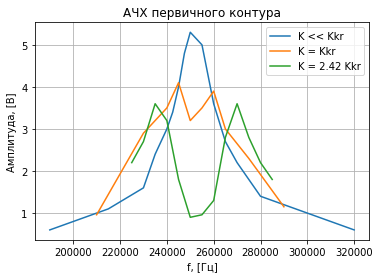

In [4]:
import matplotlib.pyplot as plt
import scipy.constants as const
from math import log10
db_conv = lambda x: 20*log10(x)

plt.grid()
plt.plot(with_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo,
         with_generator['K << Kkr', "U, В"].to_numpy(),
        label = "K << Kkr"
        )
plt.plot(with_generator['K = Kkr', "f, кГц"].to_numpy()*const.kilo,
         with_generator['K = Kkr', "U, В"].to_numpy(),
        label = "K = Kkr"
        )
plt.plot(with_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo,
         with_generator['K = 2.42 Kkr', "U, В"].to_numpy(),
        label = "K = 2.42 Kkr"
        )
#plt.hlines(5.3*(1/(2**(1/2))),min(with_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo),
#          max(with_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo))

plt.legend()
plt.title("АЧХ первичного контура")
plt.xlabel("f, [Гц]")
plt.ylabel("Амплитуда, [В]")
plt.show()

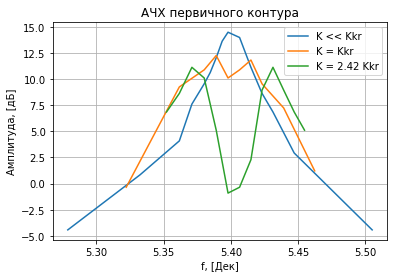

In [5]:
import matplotlib.pyplot as plt
import scipy.constants as const

plt.grid()
plt.plot([log10(i) for i in with_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i) for i in with_generator['K << Kkr', "U, В"].to_numpy()],
        label = "K << Kkr"
        )
plt.plot([log10(i) for i in with_generator['K = Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i) for i in with_generator['K = Kkr', "U, В"].to_numpy()],
        label = "K = Kkr"
        )
plt.plot([log10(i) for i in with_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i) for i in with_generator['K = 2.42 Kkr', "U, В"].to_numpy()],
        label = "K = 2.42 Kkr"
        )

plt.legend()
plt.title("АЧХ первичного контура")
plt.xlabel("f, [Дек]")
plt.ylabel("Амплитуда, [дБ]")
plt.show()

Частоты соответсвующие экстеремальным значения при соответсвтующих типах всязи равны:<br>

Тип связи    | Частоты экстремумов $f_0$ кГц
-------------| -------------
K<<Kkr       | 250
K=Kkr        | 230, 255, 270
K = 2.42 Kkr | 245, 250, 260


Теперь рассмотрим даннные относящие к **вторичному контуру**. В ходе экперимента были полученны следующие данные:<br>

In [6]:
without_generator

K << Kkr        K = Kkr       K = 2.42 Kkr      
     f, кГц   U, В  f, кГц  U, В       f, кГц  U, В
0     190.0  0.026   225.0  0.30          225  0.90
1     215.0  0.042   235.0  0.70          230  1.30
2     230.0  0.076   240.0  1.15          235  2.10
3     240.0  0.185   245.0  2.20          240  2.40
4     245.0  0.350   250.0  2.80          245  2.10
5     247.5  0.520   255.0  2.60          250  1.75
6     250.0  0.640   260.0  1.70          255  1.80
7     252.5  0.620   265.0  1.00          260  1.95
8     255.0  0.540   275.0  0.31          265  2.15
9     260.0  0.260     NaN   NaN          270  1.95
10    270.0  0.074     NaN   NaN          275  1.25
11      NaN    NaN     NaN   NaN          280  0.90
12      NaN    NaN     NaN   NaN          285  0.61

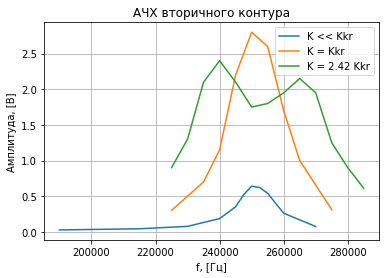

In [7]:
import matplotlib.pyplot as plt
import scipy.constants as const
from math import log10
db_conv = lambda x: 20*log10(x)

plt.grid()
plt.plot(without_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo,
         without_generator['K << Kkr', "U, В"].to_numpy(),
        label = "K << Kkr"
        )
plt.plot(without_generator['K = Kkr', "f, кГц"].to_numpy()*const.kilo,
         without_generator['K = Kkr', "U, В"].to_numpy(),
        label = "K = Kkr"
        )
plt.plot(without_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo,
         without_generator['K = 2.42 Kkr', "U, В"].to_numpy(),
        label = "K = 2.42 Kkr"
        )
#plt.hlines(5.3*(1/(2**(1/2))),min(with_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo),
#          max(with_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo))

plt.legend()
plt.title("АЧХ вторичного контура")
plt.xlabel("f, [Гц]")
plt.ylabel("Амплитуда, [В]")
plt.show()

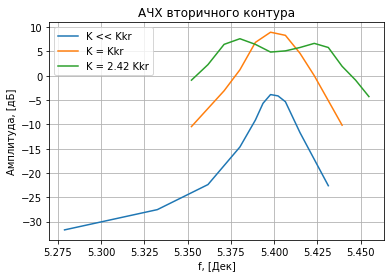

In [8]:
import matplotlib.pyplot as plt
import scipy.constants as const

plt.grid()
plt.plot([log10(i) for i in without_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i) for i in without_generator['K << Kkr', "U, В"].to_numpy()],
        label = "K << Kkr"
        )
plt.plot([log10(i) for i in without_generator['K = Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i) for i in without_generator['K = Kkr', "U, В"].to_numpy()],
        label = "K = Kkr"
        )
plt.plot([log10(i) for i in without_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i) for i in without_generator['K = 2.42 Kkr', "U, В"].to_numpy()],
        label = "K = 2.42 Kkr"
        )

plt.legend()
plt.title("АЧХ вторичного контура")
plt.xlabel("f, [Дек]")
plt.ylabel("Амплитуда, [дБ]")
plt.show()

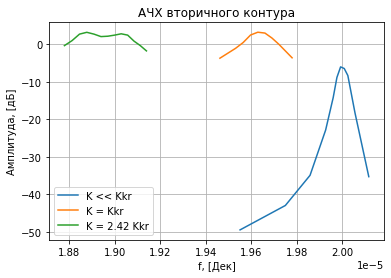

In [9]:
import matplotlib.pyplot as plt
import scipy.constants as const

plt.grid()
plt.plot([log10(i)/max(without_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo) for i in without_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i)/max(without_generator['K << Kkr', "U, В"]) for i in without_generator['K << Kkr', "U, В"].to_numpy()],
        label = "K << Kkr"
        )
plt.plot([log10(i)/max(without_generator['K = Kkr', "f, кГц"].to_numpy()*const.kilo) for i in without_generator['K = Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i)/max(without_generator['K = Kkr', "U, В"]) for i in without_generator['K = Kkr', "U, В"].to_numpy()],
        label = "K = Kkr"
        )
plt.plot([log10(i)/max(without_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo) for i in without_generator['K = 2.42 Kkr', "f, кГц"].to_numpy()*const.kilo],
         [db_conv(i)/max(without_generator['K = 2.42 Kkr', "U, В"]) for i in without_generator['K = 2.42 Kkr', "U, В"].to_numpy()],
        label = "K = 2.42 Kkr"
        )

plt.legend()
plt.title("АЧХ вторичного контура")
plt.xlabel("f, [Дек]")
plt.ylabel("Амплитуда, [дБ]")
plt.show()

Аналогично частоты соответсвующие экстеремальным значения при соответсвтующих типах всязи равны:<br>

Тип связи    | Частоты экстремумов $f_0$ кГц
-------------| -------------
K<<Kkr       | 250
K=Kkr        | 250
K = 2.42 Kkr | 240, 255, 265


Теперь перейдем к анализу связанного колебательного контура. Найдем полосу пропускания. Для этого вычислим значение частот, по постороенным выше графикам, на которых амплитуда сигнала падает на 3 дБ.<br> 

In [47]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.optimize import minimize
from math import sqrt
import numpy as np



#интерполирование -------------------------
U_less_Kkr = interp1d(without_generator['K << Kkr', "f, кГц"][without_generator['K << Kkr', "f, кГц"].notnull()]*const.kilo,
                      without_generator['K << Kkr', "U, В"][without_generator['K << Kkr', "U, В"].notnull()],
                      fill_value = "extrapolate")
U_eq_Kkr = interp1d(without_generator['K = Kkr', "f, кГц"][without_generator['K = Kkr', "f, кГц"].notnull()]*const.kilo, 
                    without_generator['K = Kkr', "U, В"][without_generator['K = Kkr', "U, В"].notnull()],
                    kind = 'linear',
                    fill_value = "extrapolate")
U_242_Kkr = interp1d(without_generator['K = 2.42 Kkr', "f, кГц"]*const.kilo, without_generator['K = 2.42 Kkr', "U, В"], fill_value = "extrapolate")


#интерполирование -------------------------

def Test(x):
    return x**2-1

def extrap1d(interpolator):
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return array(map(pointwise, array(xs)))

    return ufunclike

#print(U_less_Kkr(250e3))
def detect(what, accuracy, start, stop, f):
    i = (start + stop)/2
    #print(abs(f(i) - what))
    #for i in range(1,10):
    while abs(f(i) - what) > accuracy:
        i = (start + stop)/2
        #print(start, stop)
        #print(f(i) - what)
        if f(start) - f(stop) <= 0:
            if f(i)-what > 0:
                stop = i
            else:
                start = i
        else:
            if f(i)-what > 0:
                start = i
            else:
                stop = i
    return i


def detectup(what, accuracy, start, stop, f):
    i = (start + stop)/2
    #print(abs(f(i) - what))
    #for i in range(1,10):
    while abs(f(i) - what) > accuracy:
        i = (start + stop)/2
        #print(start, stop)
        #print(f(i) - what)
        if f(i)-what > 0:
            stop = i
        else:
            start = i
    return i
 
def detectdown(what, accuracy, start, stop, f):
    i = (start + stop)/2
    #print(abs(f(i) - what))
    #for i in range(1,10):
    while abs(f(i) - what) > accuracy:
        i = (start + stop)/2
        #print(start, stop)
        #print(f(i) - what)
        if f(i)-what > 0:
            start = i
        else:
            stop = i
    return i    
            
#print(detect(max(without_generator['K << Kkr', "U, В"]) * 1/sqrt(2), 0.1, min(without_generator['K << Kkr', "f, кГц"])*const.kilo, 249e3, U_less_Kkr))
#print(detect(max(without_generator['K << Kkr', "U, В"]) * 1/sqrt(2), 249e3, max(without_generator['K << Kkr', "f, кГц"])*const.kilo, 249e3, U_less_Kkr))

def bandwidth(func, aim, interval):
    accuracy = 1/1e5
    
    w_down_3 = detect(aim,
                      accuracy,
                      interval[2],
                      interval[3],
                      func)
    w_up_3 = detect(aim,
                    accuracy,
                    interval[0],
                    interval[1],
                    func) 
    P = w_down_3 - w_up_3
    #print(P)
    return [w_up_3, w_down_3, P]


def squareness_factor(func, aim, interval):
    accuracy = 1/1e5
    
    w_3 = detect(aim*(1/sqrt(2)),
                  accuracy,
                  interval[0],
                  interval[1],
                  func)
    #print(w_3)
    w_20 = detect(aim/1e1,
                    accuracy,
                    interval[2],
                    interval[3],
                    func)
    #print(w_20)
    K = w_20/w_3
    
    return [w_3, w_20, K]

#print("fsolve:",fsolve(Test,[-10,10]))

#func = lambda x: U_less_Kkr(x) - max(without_generator['K << Kkr', "U, В"])

#print("sol_eq:",fsolve(func,[210e3,2400e3],xtol=1e-01))
#print("min:",minimize(func,[200e3,2500e3],method='powell'))
#print(U_less_Kkr(190e3))


#print(detect(max(without_generator['K << Kkr', "U, В"])* 1/sqrt(2), 0.1, 249e3, max(without_generator['K << Kkr', "f, кГц"])*const.kilo, U_less_Kkr))
#print(detectdown(max(without_generator['K << Kkr', "U, В"])* 1/sqrt(2), 0.1, 249e3, max(without_generator['K << Kkr', "f, кГц"])*const.kilo, U_less_Kkr))
#print(U_less_Kkr(min(without_generator['K << Kkr', "f, кГц"])*const.kilo))
#print(max(without_generator['K << Kkr', "f, кГц"])*const.kilo)

#w_down_3 = detect(max(without_generator['K << Kkr', "U, В"]) * 1/sqrt(2),
#                  1/1e10,
#                  249e3,
#                  max(without_generator['K << Kkr', "f, кГц"])*const.kilo,
#                 U_less_Kkr)
#w_up_3 = detect(max(without_generator['K << Kkr', "U, В"]) * 1/sqrt(2),
#                1/1e10,
#                min(without_generator['K << Kkr', "f, кГц"])*const.kilo,
#                249e3,
#                U_less_Kkr) 
#P_lessKkr = w_down_3 - w_up_3
#print(P_lessKkr)


#расчеты требуемых парамеров -----------------------------------------

P_less_Kkr_3 = (bandwidth(U_less_Kkr,
                max(without_generator['K << Kkr', "U, В"]) * 1/sqrt(2),
                [min(without_generator['K << Kkr', "f, кГц"])*const.kilo,
                 249e3,
                 249e3,
                 max(without_generator['K << Kkr', "f, кГц"])*const.kilo,
                 ]))

#print(U_less_Kkr(290e3))
#U_less_Kkr_extra = extrap1d(U_less_Kkr)
#U_less_Kkr_extra([290e3])


#w_40 = detect( max(without_generator['K << Kkr', "U, В"])/1e3,
#                1,
#               min(without_generator['K << Kkr', "f, кГц"])*const.kilo,
#               249e3,
#                U_less_Kkr
#               ) 
#print(w_40)

P_less_Kkr_20 = bandwidth(U_less_Kkr,
                max(without_generator['K << Kkr', "U, В"])*0.1,
               [min(without_generator['K << Kkr', "f, кГц"])*const.kilo,
                 249e3,
                249e3,
                 280e3
                ])



P_eq_Kkr_3 = (bandwidth(U_eq_Kkr,
                max(without_generator['K = Kkr', "U, В"]) * 1/sqrt(2),
                [min(without_generator['K = Kkr', "f, кГц"])*const.kilo,
                 249e3,
                 249e3,
                 max(without_generator['K = Kkr', "f, кГц"])*const.kilo,
                 ]))

P_eq_Kkr_20 = bandwidth(U_eq_Kkr,
                max(without_generator['K = Kkr', "U, В"])*0.1,
                [220e3,
                 249e3,
                 249e3,
                 280e3
                ])

#w_40 = detect(max(without_generator['K = Kkr', "U, В"])*0.1,
#                1,
#              220e3,
#                249e3,
#                U_eq_Kkr
#               ) 
#print(w_40)
#print(U_eq_Kkr(300e3))

P_242_Kkr_3 = (bandwidth(U_242_Kkr,
                max(without_generator['K = 2.42 Kkr', "U, В"]) * 1/sqrt(2),
                [min(without_generator['K = 2.42 Kkr', "f, кГц"])*const.kilo,
                 249e3,
                 249e3,
                 max(without_generator['K = 2.42 Kkr', "f, кГц"])*const.kilo,
                 ]))

P_242_Kkr_20 = bandwidth(U_242_Kkr,
                max(without_generator['K = 2.42 Kkr', "U, В"])*0.1,
                [210*const.kilo,
                249e3,
                 249e3,
                 300e3
                ])

#расчеты требуемых парамеров -----------------------------------------




#print(max(without_generator['K << Kkr', "U, В"]) * 1/sqrt(2)*const.kilo)
#print(fsolve(U_less_Kkr,[200e3,220e3],xtol=1e-1))

#(min(without_generator['K << Kkr', "f, кГц"]),max(without_generator['K << Kkr', "f, кГц"]), 1*const.kilo)

#plt.grid()
#plt.plot(without_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo,
#         without_generator['K << Kkr', "U, В"].to_numpy(),
#        label = "K << Kkr"
#        )

#print(P_less_Kkr_3[2],P_less_Kkr_20[2])
#print(P_eq_Kkr_3[2],P_eq_Kkr_20[2])
#print(P_242_Kkr_3[2],P_242_Kkr_20[2])

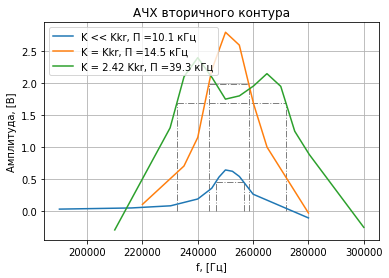

In [49]:

#расчеты требуемых парамеров -----------------------------------------




#print(max(without_generator['K << Kkr', "U, В"]) * 1/sqrt(2)*const.kilo)
#print(fsolve(U_less_Kkr,[200e3,220e3],xtol=1e-1))

#(min(without_generator['K << Kkr', "f, кГц"]),max(without_generator['K << Kkr', "f, кГц"]), 1*const.kilo)

#plt.grid()
#plt.plot(without_generator['K << Kkr', "f, кГц"].to_numpy()*const.kilo,
#         without_generator['K << Kkr', "U, В"].to_numpy(),
#        label = "K << Kkr"
#        )


##Построение графиков---------------------------------------
plt.grid()
plot_x = np.linspace(min(without_generator['K << Kkr', "f, кГц"]*const.kilo),
                     280*const.kilo,
                     1000)

plt.plot(plot_x,
         U_less_Kkr(plot_x),
        label = "K << Kkr, П ={:.1F} кГц".format(P_less_Kkr_3[2]/1e3),
        )

plt.vlines(P_less_Kkr_3[0],0,U_less_Kkr(P_less_Kkr_3[0]),
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
plt.vlines(P_less_Kkr_3[1],0,U_less_Kkr(P_less_Kkr_3[1]),
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
plt.hlines(U_less_Kkr(P_less_Kkr_3[0]),P_less_Kkr_3[0],P_less_Kkr_3[1],
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
#plt.hlines(max(without_generator['K << Kkr', "U, В"])/1e1,
#          min(without_generator['K << Kkr', "f, кГц"]*const.kilo),
#          max(without_generator['K << Kkr', "f, кГц"]*const.kilo),
#          linestyle = '-.',
#          linewidth = 1,
#          color = 'gray')


plot_x = np.linspace(220*const.kilo,
                     280*const.kilo,
                     1000)

plt.plot(plot_x,
         U_eq_Kkr(plot_x),
        label = "K = Kkr, П ={:.1F} кГц".format(P_eq_Kkr_3[2]/1e3)
        )
plt.vlines(P_eq_Kkr_3[0],0,U_eq_Kkr(P_eq_Kkr_3[0]),
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
plt.vlines(P_eq_Kkr_3[1],0,U_eq_Kkr(P_eq_Kkr_3[1]),
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
plt.hlines(U_eq_Kkr(P_eq_Kkr_3[0]),P_eq_Kkr_3[0],P_eq_Kkr_3[1],
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
#plt.hlines(max(without_generator['K = Kkr', "U, В"])/1e1,
#           min(without_generator['K = Kkr', "f, кГц"]*const.kilo),
#           max(without_generator['K = Kkr', "f, кГц"]*const.kilo),
#           linestyle = '-.',
#           linewidth = 1,
#           color = 'gray')



plot_x = np.linspace(210*const.kilo,
                     300*const.kilo,
                     1000)

plt.plot(plot_x,
         U_242_Kkr(plot_x),
        label = "K = 2.42 Kkr, П ={:.1F} кГц".format(P_242_Kkr_3[2]/1e3)
        )
plt.vlines(P_242_Kkr_3[0],0,U_242_Kkr(P_242_Kkr_3[0]),
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
plt.vlines(P_242_Kkr_3[1],0,U_242_Kkr(P_242_Kkr_3[1]),
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')
plt.hlines(U_242_Kkr(P_242_Kkr_3[0]),P_242_Kkr_3[0],P_242_Kkr_3[1],
            linestyle = '-.',
            linewidth = 1,
            color = 'gray')

#plt.hlines(max(without_generator['K = 2.42 Kkr', "U, В"])/1e1,
#           min(without_generator['K = 2.42 Kkr', "f, кГц"]*const.kilo),
#           max(without_generator['K = 2.42 Kkr', "f, кГц"]*const.kilo),
#           linestyle = '-.',
#           linewidth = 1,
#           color = 'gray')

plt.legend()
plt.title("АЧХ вторичного контура")
plt.xlabel("f, [Гц]")
plt.ylabel("Амплитуда, [В]")
plt.show()
##Построение графиков---------------------------------------
#print(U_less_Kkr(w_down_3))

По графику определим значение частоты соответсвующей изменению амплитуды колебаний на 3 дБ
<font color="RoyalBlue">Сначала для случая К = 0.01Kr:</font>
<font color="Black">Переходим к вычислениям.</font>

In [ ]:
import handcalcs.render

In [50]:
%%render
w_down = P_less_Kkr_3[0] #Гц
w_up = P_less_Kkr_3[1] #Гц

<IPython.core.display.Latex object>

Теперь получим полосу пропускания P на 3 дБ

In [55]:
%%render
P_3 = (w_up - w_down)/1e3 # кГц

<IPython.core.display.Latex object>

По графику определим значение частоты соответсвующей изменению амплитуды колебаний на 20 дБ

In [53]:
%%render
w_down = P_less_Kkr_20[0] #Гц
w_up = P_less_Kkr_20[1] #Гц

<IPython.core.display.Latex object>

Теперь получим полосу пропускания P на 20 дБ

In [57]:
%%render
P_20 = (w_up - w_down)/1e3 # кГц

<IPython.core.display.Latex object>

Найдем коэффициент прямоугольности, характеризующий избирательные свойства цепи.</br>

In [59]:
%%render
K = (P_20)/(P_3)
K = (P_less_Kkr_20[2])/(P_less_Kkr_3[2]) #Искомый коэффициент прямоугольности

<IPython.core.display.Latex object>

Повторим аналогичные действия <font color="Goldenrod"> для случая К=Kr:</font>

In [65]:
%%render
w_down = P_eq_Kkr_3[0] #Гц, нижшняя граница для 3 дБ
w_up = P_eq_Kkr_3[1] #Гц, верхняя граница для 3 дБ
P_3 = (w_up - w_down)/1e3 # кГц, коэфициент пропускания

<IPython.core.display.Latex object>

In [66]:
%%render
w_down = P_eq_Kkr_20[0] #Гц, нижшняя граница для 20 дБ
w_up = P_eq_Kkr_20[1] #Гц, верхняя граница для 20 дБ
P_20 = (w_up - w_down)/1e3 # кГц
K = (P_20)/(P_3)
K = (P_eq_Kkr_20[2])/(P_eq_Kkr_3[2])

<IPython.core.display.Latex object>

Повторим аналогичные действия <font color="green"> для случая К=2.42Kr:</font>

In [67]:
%%render
w_down = P_242_Kkr_3[0] #Гц, нижшняя граница для 3 дБ
w_up = P_242_Kkr_3[1] #Гц, верхняя граница для 3 дБ
P_3 = (w_up - w_down)/1e3 # кГц, коэфициент пропускания

<IPython.core.display.Latex object>

In [70]:
%%render
w_down = P_242_Kkr_20[0] #Гц, нижшняя граница для 20 дБ
w_up = P_242_Kkr_20[1] #Гц, верхняя граница для 20 дБ
P_20 = (w_up - w_down)/1e3 # кГц
K = (P_20)/(P_3)
K = (P_242_Kkr_20[2])/(P_242_Kkr_3[2])

<IPython.core.display.Latex object>

#### Вывод

Полоса пропускания связанных колебательных контуров изменяется в зависимости от параметра связи.
Если K=k*Q<<1, то полоса пропускания связанного контура уже одиночного.
При K=1, полоса пропускания равна sqrt(2) от полосы одиночного контура.
Если K≈2.41, то полоса, наоборот сильно шире, примерно в 3 раза.
Форму резонансной кривой при K>Kкр, можно объяснить тем, что на каких-то частотах, отличных от резонанса, мнимые составляющие собственного и вносимого сопротивления скомпенсируются. При этом, из-за того, что сопротивление будет чисто резистивным, токи контуров достигнут максимально возможного значения. При критическом параметре связи, достигается условие передачи максимальной мощности.
Избирательность связанных контуров лучше, чем избирательность одиночного колебательного контура. Наилучшие показатели достигаются при K=2.42Kкр, так как коэффициент прямоугольности в этом случае меньше, чем при других параметрах связи.